In [1]:
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt
import seaborn as sns

## Part 1:
create a code to extract the A, B, C values of any sequence and use them to calculate the associated indexes.

I am working on the content presented in **Lexographic index equations.docx** script, which requires for some equations to be turned into python code.

In [2]:
def A(lista):
    A_v = []
    for i in range(len(lista)):
        if lista[i] != 0 and lista[i]!="0":      #not empty
            A_v.append(i+1)
    return A_v

def B(lista):
    B_v = []
    i = 0
    while i < len(lista):
        if lista[i] != 0 and lista[i]!="0":      #not empty
            j = i + 1
            while j < len(lista) and (lista[j] == 0 or lista[j]=="0"):
                lista[j], lista[j - 1] = lista[j - 1], lista[j]
                j += 1

            B_v.append(j)
            i = j
        else:
            i += 1

    return B_v

def C(lista):
    C_v = []

    for i in range(len(lista)):
        if lista[i] != 0 and lista[i]!="0":    #not empty
            j = i - 1
            while j >= 0 and (lista[j] == 0 or lista[j]=="0"):
                lista[j], lista[j + 1] = lista[j + 1], lista[j]
                j -= 1

            C_v.append(j + 2)

    return C_v

In [3]:
#After I define functions to compute A, B, C, I use all of them together.

def parameters(data):
    with open(data) as file:
        heading = next(file)
        reader = csv.reader(file)
        A_v = list()
        B_v = list()
        C_v = list()
        data = []                
            
        for row in reader:
            data.append(row)
            A_r = A(row)
            A_v.append(A_r)
            B_r = B(row)
            B_v.append(B_r)
            C_r = C(row)
            C_v.append(C_r)               
    return A_v, B_v, C_v, data
            

In [4]:
#Some sequences to work on.
test_data = "data for test.csv"

ABC = parameters(test_data)
A_score, B_score, C_score, data = ABC

In [6]:
#We need to define a function to obtain the factorial of a number.
def factorial(n):
    result = 1
    for i in range(2, n + 1):
        result *= i
    return result

In [7]:
def first_index(A,B,C, length):
    index_1 = []
    for a in A:        #A,B,C always have the same length.
        if a !=[]:
            ind = 1   #1 + T!/e_0!
            pos = A.index(a)      #unlike B and C, A is always different meaning positions aren't ambiguous
            ind -= factorial(B[pos][len(a)-1])/(factorial(C[pos][len(a)-1])*factorial(B[pos][len(a)-1]-C[pos][len(a)-1]))
            diff = 0
            for i in range(len(a)):
                ind += factorial(length)/(factorial(i+1)*factorial(length-(i+1)))
                diff = factorial(B[pos][i])/(factorial(C[pos][i])*factorial(B[pos][i]-C[pos][i])) - factorial(A[pos][i])/(factorial(C[pos][i])*factorial(A[pos][i]-C[pos][i]))
                
                ind += diff
        else:
            ind = 0
        index_1.append(ind)
    return index_1

In [9]:
def second_index(A,B,C, length):
    index_2 = []
    for a in A:
        if a !=[]:
            pos = A.index(a)
            ind = 1+ (factorial(length)/(factorial(len(a))*factorial(length-len(a)))) - (factorial(B[pos][len(a)-1])/(factorial(C[pos][len(a)-1])*factorial(B[pos][len(a)-1]-C[pos][len(a)-1])))
            for i in range(len(a)):
                diff = factorial(B[pos][i])/(factorial(C[pos][i])*factorial(B[pos][i]-C[pos][i])) - factorial(A[pos][i])/(factorial(C[pos][i])*factorial(A[pos][i]-C[pos][i]))
                ind += diff
            
            ind /= (factorial(length)/(factorial(len(a))*factorial(length-len(a))))    
            ind += 2*len(a)-1
            ind = round(ind,5)

        else:
            ind = 0
        index_2.append(ind)
    return index_2      

In [10]:
second_index2 = second_index(A_score, B_score, C_score, 4)

In [12]:
def third_index(A,B,C, length):
    ratios = []
    index_3a = []
    index_3b = []
    for a in A:
        ind_a = round((len(a)/length),5)
        index_3a.append(ind_a)
        pos = A.index(a)
        if a!=[]:
            ind = 1+ (factorial(length)/(factorial(len(a))*factorial(length-len(a)))) - (factorial(B[pos][len(a)-1])/(factorial(C[pos][len(a)-1])*factorial(B[pos][len(a)-1]-C[pos][len(a)-1])))
            for i in range(len(a)):
                diff = factorial(B[pos][i])/(factorial(C[pos][i])*factorial(B[pos][i]-C[pos][i])) - factorial(A[pos][i])/(factorial(C[pos][i])*factorial(A[pos][i]-C[pos][i]))
                ind += diff
                
            ind /= (factorial(length)/(factorial(len(a))*factorial(length-len(a))))+1
            ind = round(ind,5)
        else:
            ind = factorial(length)/(factorial(len(a))*factorial(length-len(a))) / (factorial(length)/(factorial(len(a))*factorial(length-len(a)))+1)
        index_3b.append(ind)        
        
    return index_3a, index_3b

In [13]:
third_indexA, third_indexB = third_index(A_score, B_score, C_score,4)

In [14]:
#For better visualization each sequence is turned from a list of characters to a string of length 4.
sequences_r = []
for i in data:
    j = "".join(i)
    sequences_r.append(j)

In [15]:
#Create a csv containing the sequences, A, B, C, index_1, index_2, index_3a, index_3b
index = pd.DataFrame({'Data':sequences_r, "A":A_score, "B": B_score, "C": C_score, "Index_1": first_index1,
                     "Index_2": second_index2, "Index_3A":third_indexA, "Index_3B":third_indexB})


index.to_csv("index.csv", header=True)

Text(0, 0.5, "d'")

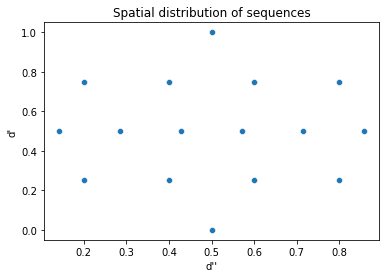

In [17]:
## Simple plot
sns.scatterplot(data=index, x=index.Index_3B, y=index.Index_3A)
plt.title("Spatial distribution of sequences")
plt.xlabel("d''")
plt.ylabel("d'")

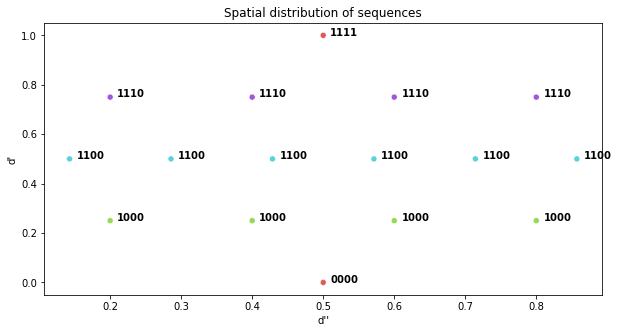

In [39]:
#Plot with labels
plt.figure(figsize=(10,5)) 

x_axis = [i+0 for i in index.Index_3B]                                 #replace 0 with valuue to change position on x-axis.
p1 = sns.scatterplot(data=index, x=x_axis, y=index.Index_3A,
                    legend=False, hue=index.Index_3A, palette="hls") #hue and palette are optional

plt.title("Spatial distribution of sequences")
plt.xlabel("d''")
plt.ylabel("d'")

for line in range(0,index.shape[0]):          #Dataset's length
     p1.text(index.Index_3B[line]+0+0.01, index.Index_3A[line],       #also need to change the value of 0 here.
     index.Data[line], horizontalalignment='left', 
     size='medium', color='black', weight='semibold')

plt.savefig("Index visualization.png", transparent=True)

## Part 2 
Now, generalize the algorithm to make it work for more sequences.

In [148]:
#Define a function to separate lists based on the values (1,2,3,...)
def separator(n,data):
    lists = []
    new_data = [x for xs in data for x in xs]         #Transform a list of lists into a single list.
    new_data = list(set(new_data))                    #Only return a list of all its different values.
    
    for row in data:
        lista = [[0]*len(row) for i in range(n+1)]
        for i in range(len(row)):
            lista[new_data.index(row[i])][i] = row[i]
        
        lista.pop(0)                   #Remove the first list which only contains zero.
        lists.append(lista)
    return lists

FIrst, turn a list of lists into a single list; then, obtain the set of different values; 
afterward, for each item in the set create a dictionary key.
The separator function should create N lists (where N is the number of keys), each having the corresponding key put in the proper positions.


In [189]:
def lexgraph(n, data):
    newdata = separator(n,data)
    length=len(newdata[0])          #Value to get A,B,C
    As = []
    Bs = []
    Cs = []
    indexes_3a = [[] for _ in range(length)]
    indexes_3b = [[] for _ in range(length)] 
    data_r = []                    #The separated lists all joined in a single one, to be turned in a column.
    for row in newdata:
        for item in row:
            data_r.append(list(item))
            A_v = A(item)
            B_v = B(item)
            C_v = C(item)
            As.append(A_v)
            Bs.append(B_v)
            Cs.append(C_v)

    third_index_A, third_index_B = third_index(As,Bs,Cs, len(data[0]))    #List of all values. 
    Database = pd.DataFrame({'Data':data})

    for i in range(length):
        indexes_3a[i] = third_index_A[i::length]
        indexes_3b[i] = third_index_B[i::length]
        Database[str(i+1)+"A"] = indexes_3a[i] 
        Database[str(i+1)+"B"] = indexes_3b[i]
    
    return Database

In [190]:
database = [[0,1,1,2,1,2],
            [0,1,2,2,0,1],
            [0,2,1,1,1,2],
            [0,1,1,2,1,0],
            [0,0,1,2,0,2]]

lexgraph(2, database)

,Data,1A,1B,2A,2B
0,"[0, 1, 1, 2, 1, 2]",0.500,0.667,0.333,0.125
1,"[0, 1, 2, 2, 0, 1]",0.333,0.250,0.333,0.625
2,"[0, 2, 1, 1, 1, 2]",0.500,0.524,0.333,0.250
3,"[0, 1, 1, 2, 1, 0]",0.500,0.667,0.167,0.429
4,"[0, 0, 1, 2, 0, 2]",0.167,0.571,0.333,0.125


In [25]:
#Now, however, we need to make it work for a sequence of any length.
#New testing data
Data = pd.read_stata("clu_cosa1_patrick.dta")

In [ ]:
Data.columns

In [ ]:
#We need to see how many different categories there are.
Data.cosa10.unique()


In [127]:
#We take all cosa columns and turn them into a sequence.
Values = []
for index,row in Data.iterrows():
    cose = list(Data.iloc[index,3:51].values)
    Values.append(cose)
#Values

In [159]:
Data.columns

Index(['idx', 'day', 'GG1', 'cosa1', 'cosa2', 'cosa3', 'cosa4', 'cosa5',
       'cosa6', 'cosa7', 'cosa8', 'cosa9', 'cosa10', 'cosa11', 'cosa12',
       'cosa13', 'cosa14', 'cosa15', 'cosa16', 'cosa17', 'cosa18', 'cosa19',
       'cosa20', 'cosa21', 'cosa22', 'cosa23', 'cosa24', 'cosa25', 'cosa26',
       'cosa27', 'cosa28', 'cosa29', 'cosa30', 'cosa31', 'cosa32', 'cosa33',
       'cosa34', 'cosa35', 'cosa36', 'cosa37', 'cosa38', 'cosa39', 'cosa40',
       'cosa41', 'cosa42', 'cosa43', 'cosa44', 'cosa45', 'cosa46', 'cosa47',
       'cosa48', 'tx', 'k1a', 'k1b', 'k2a', 'k2b', 'k3a', 'k3b', 'k4a', 'k4b',
       'k5a', 'k5b', 'k6a', 'k6b', 'k7a', 'k7b', 'k8a', 'k8b'],
      dtype='object')

In [191]:
lexgraph_output = lexgraph(8, Values)
lexgraph_output.to_csv("results.csv")        #To save the results